<a href="https://colab.research.google.com/github/emande/python-for-data-analysis/blob/master/Time_Series_Evaluation_Draft_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Time Series

An aproach to predict stock data.

by: Atwine Mugume.

### Things to learn:-

- How to set up your own project.

- Working with time based data.



---



1. [Article](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-9-time-series-analysis-in-python-a270cb05e0b3)


2. [Article 2](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-9-part-3-predicting-the-future-with-facebook-prophet-3f3af145cdc)


3. [Python Quants](https://gist.github.com/yhilpisch/dfd1e9c87864d5e3d6b54f1943a9c1ec)

4. [You Tube Video Class](https://github.com/mGalarnyk/Python_Tutorials/tree/master/Time_Series)


5. [You Tube](https://www.youtube.com/watch?v=x4nO5yoarM0)

In [0]:
#import necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

#remove warnings
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#read in the data downloaded
#use the variable parse_dates to make the dates easy to work with in your data
data = pd.read_csv('dt.csv', parse_dates=['Date'])

In [0]:
#how much data points do I have?
data.shape

(12413, 7)

# Creating a test dataframe:

At this point I need to split the data in such a way that I keep some aside which the computer will not see at all in the process of training. 

I am going to take out 10 Years of data and see if our model can accurately predict the information that we already know.

In [0]:
#let me create a column called Year, Quarter,

data['Year'] = data['Date'].apply(lambda x: x.year)
data["Quarter"] = data['Date'].apply(lambda x: x.quarter)

In [0]:
data.head(4)

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Quarter
0,1971-02-05,100.000000,100.000000,100.000000,100.000000,100.000000,0,1971,1
1,1971-02-08,100.839996,100.839996,100.839996,100.839996,100.839996,0,1971,1
2,1971-02-09,100.760002,100.760002,100.760002,100.760002,100.760002,0,1971,1
3,1971-02-10,100.690002,100.690002,100.690002,100.690002,100.690002,0,1971,1


In [0]:
#I want to categorize the Volume columns
data['Volume'] = abs(data["Volume"])
data['Bins'] = pd.cut((data['Volume']),3, labels=False)
data['Change'] = data['Close'] - data['Open']

#create a statistic based on aggregation
data['%Change'] = (data['Change']/data['Open']) *100

#classify the aggregative statistic.
data["Direction"] = data['Change'].apply(lambda x: 1 if x >0 else 0)

In [0]:
data.head(4)

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Quarter,Bins,Change,%Change,Direction
0,1971-02-05,100.000000,100.000000,100.000000,100.000000,100.000000,0,1971,1,0,0.0,0.0,0
1,1971-02-08,100.839996,100.839996,100.839996,100.839996,100.839996,0,1971,1,0,0.0,0.0,0
2,1971-02-09,100.760002,100.760002,100.760002,100.760002,100.760002,0,1971,1,0,0.0,0.0,0
3,1971-02-10,100.690002,100.690002,100.690002,100.690002,100.690002,0,1971,1,0,0.0,0.0,0


In [0]:
#SMA - Simple Moving Average:
data['Mid'] = (data['Close'] + data['Open'])/2

In [0]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Quarter,Bins,Change,%Change,Direction,Mid
0,1971-02-05,100.000000,100.000000,100.000000,100.000000,100.000000,0,1971,1,0,0.0,0.0,0,100.000000
1,1971-02-08,100.839996,100.839996,100.839996,100.839996,100.839996,0,1971,1,0,0.0,0.0,0,100.839996
2,1971-02-09,100.760002,100.760002,100.760002,100.760002,100.760002,0,1971,1,0,0.0,0.0,0,100.760002
3,1971-02-10,100.690002,100.690002,100.690002,100.690002,100.690002,0,1971,1,0,0.0,0.0,0,100.690002
4,1971-02-11,101.449997,101.449997,101.449997,101.449997,101.449997,0,1971,1,0,0.0,0.0,0,101.449997


In [0]:
#Rolling Mean

data['SMA1'] = data['Mid'].rolling(12).mean()
data['SMA2'] = data['Mid'].rolling(36).mean()

In [0]:
data.head(4)

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Quarter,Bins,Change,%Change,Direction,Mid,SMA1,SMA2
0,1971-02-05,100.000000,100.000000,100.000000,100.000000,100.000000,0,1971,1,0,0.0,0.0,0,100.000000,NaN,NaN
1,1971-02-08,100.839996,100.839996,100.839996,100.839996,100.839996,0,1971,1,0,0.0,0.0,0,100.839996,NaN,NaN
2,1971-02-09,100.760002,100.760002,100.760002,100.760002,100.760002,0,1971,1,0,0.0,0.0,0,100.760002,NaN,NaN
3,1971-02-10,100.690002,100.690002,100.690002,100.690002,100.690002,0,1971,1,0,0.0,0.0,0,100.690002,NaN,NaN


In [0]:
#this is an alias for the dates, so we can plot using this instead of using the dates to plot the data
data['Ticks'] = range(0, len(data.Date.index))

In [0]:
data.head(4)

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Quarter,Bins,Change,%Change,Direction,Mid,SMA1,SMA2,Ticks
0,1971-02-05,100.000000,100.000000,100.000000,100.000000,100.000000,0,1971,1,0,0.0,0.0,0,100.000000,NaN,NaN,0
1,1971-02-08,100.839996,100.839996,100.839996,100.839996,100.839996,0,1971,1,0,0.0,0.0,0,100.839996,NaN,NaN,1
2,1971-02-09,100.760002,100.760002,100.760002,100.760002,100.760002,0,1971,1,0,0.0,0.0,0,100.760002,NaN,NaN,2
3,1971-02-10,100.690002,100.690002,100.690002,100.690002,100.690002,0,1971,1,0,0.0,0.0,0,100.690002,NaN,NaN,3


In [0]:
#Let's take a look at the tail columns of the data
data.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Quarter,Bins,Change,%Change,Direction,Mid,SMA1,SMA2,Ticks
12408,2020-04-17,8667.480469,8670.299805,8531.690430,8650.139648,8650.139648,4335020000,2020,2,2,-17.340821,-0.200068,0,8658.810058,8030.097961,7893.377753,12408
12409,2020-04-20,8553.379883,8684.910156,8553.379883,8560.730469,8560.730469,3796950000,2020,2,2,7.350586,0.085938,1,8557.055176,8125.682556,7890.649970,12409
12410,2020-04-21,8460.690430,8480.290039,8215.690430,8263.230469,8263.230469,3756290000,2020,2,2,-197.459961,-2.333852,0,8361.960450,8205.647583,7889.077894,12410
12411,2020-04-22,8434.549805,8537.309570,8404.540039,8495.379883,8495.379883,3025060000,2020,2,1,60.830078,0.721201,1,8464.964844,8292.296733,7879.503174,12411
12412,2020-04-23,8528.839844,8635.230469,8475.200195,8494.750000,8494.750000,3734720000,2020,2,2,-34.089844,-0.399701,0,8511.794922,8352.720886,7870.814290,12412


In [0]:
#I am going to drop add the NA values
data.dropna(inplace=True)

In [0]:
#what is the size of the data?
data.shape

(12378, 17)

In [0]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Quarter,Bins,Change,%Change,Direction,Mid,SMA1,SMA2,Ticks
35,1971-03-29,105.199997,105.199997,105.199997,105.199997,105.199997,0,1971,1,0,0.0,0.0,0,105.199997,105.199165,102.926388,35
36,1971-03-30,105.440002,105.440002,105.440002,105.440002,105.440002,0,1971,1,0,0.0,0.0,0,105.440002,105.277499,103.077500,36
37,1971-03-31,105.970001,105.970001,105.970001,105.970001,105.970001,0,1971,1,0,0.0,0.0,0,105.970001,105.347499,103.220000,37
38,1971-04-01,106.339996,106.339996,106.339996,106.339996,106.339996,0,1971,2,0,0.0,0.0,0,106.339996,105.412499,103.375000,38
39,1971-04-02,106.860001,106.860001,106.860001,106.860001,106.860001,0,1971,2,0,0.0,0.0,0,106.860001,105.525832,103.546388,39


# Visualize the moving average

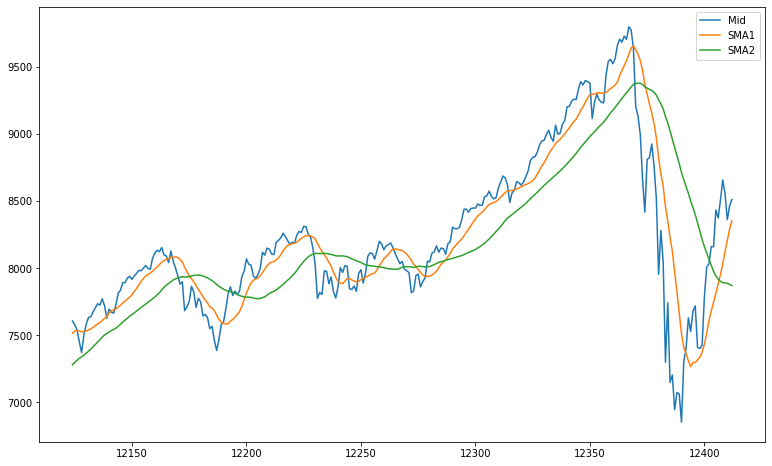

In [0]:
#moving average visualisation from 2019 March
#Here I just want to see the movements of the stock with rolling mean and moving average.
dte = data[data['Date'] > '2019-03-01']
dte[['Mid', 'SMA1', 'SMA2']].plot(figsize=(13, 8));

In [0]:
#SMA Positon
# long position = +1 | short position = -1
data['SMAPosition'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)

In [0]:
data.head(4)

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Quarter,Bins,Change,%Change,Direction,Mid,SMA1,SMA2,Ticks,SMAPosition
0,1971-02-05,100.000000,100.000000,100.000000,100.000000,100.000000,0,1971,1,0,0.0,0.0,0,100.000000,NaN,NaN,0,-1
1,1971-02-08,100.839996,100.839996,100.839996,100.839996,100.839996,0,1971,1,0,0.0,0.0,0,100.839996,NaN,NaN,1,-1
2,1971-02-09,100.760002,100.760002,100.760002,100.760002,100.760002,0,1971,1,0,0.0,0.0,0,100.760002,NaN,NaN,2,-1
3,1971-02-10,100.690002,100.690002,100.690002,100.690002,100.690002,0,1971,1,0,0.0,0.0,0,100.690002,NaN,NaN,3,-1


In [0]:
# https://gist.github.com/yhilpisch/dfd1e9c87864d5e3d6b54f1943a9c1ec

# Please have a look at that link it will help shed some light on this financial data.

#https://learn.datacamp.com/courses/time-series-analysis-in-python

#take the datacamp course on this matter to help you understand better.

In [0]:
data.head(5)

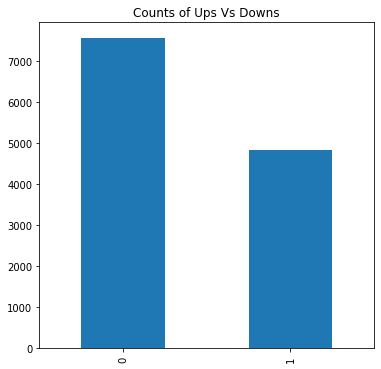

In [0]:
#visualize how the data is moving oscilating over time
#we see that we have more up movements than down
#with this we can also use a classification algorithm to tell us if the stock is going up or down and by what percentage.
plt.figure(figsize= (6,6))
plt.title("Counts of Ups Vs Downs")
data.Direction.value_counts().plot(kind = 'bar')


Text(0.5, 1.0, 'Count of Records Per Year')

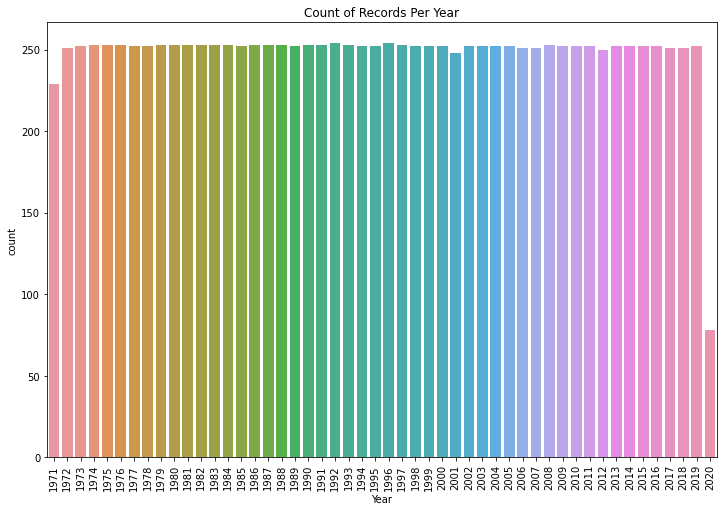

In [0]:
#value counts in years
#here I want to make sure I have good data.
#so I count all the values based on the years that I downloaded.
plt.figure ( figsize = (12,8))
sns.countplot(
    x = 'Year',
    data = data

)
plt.xticks(rotation = 90)
plt.title("Count of Records Per Year")

In [0]:
#value counts based on the bins
#I put the data in bins so that its easy to classify them.
data.Bins.value_counts()

0    9037
1    3315
2      61
Name: Bins, dtype: int64

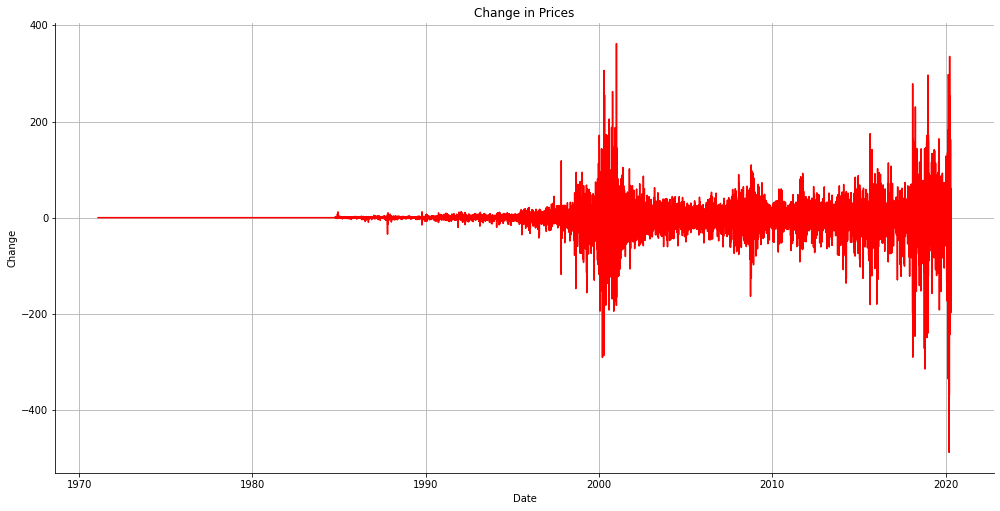

In [0]:
#Choose a stat that is a better representation of what is really going on..in the market.
#this makes more sense to be the metric we look at.
sns.relplot(x = 'Date', y = 'Change', data=data, kind='line', height= 7, aspect= 2,color = 'red')
plt.title("Change in Prices")
plt.grid()
plt.show()

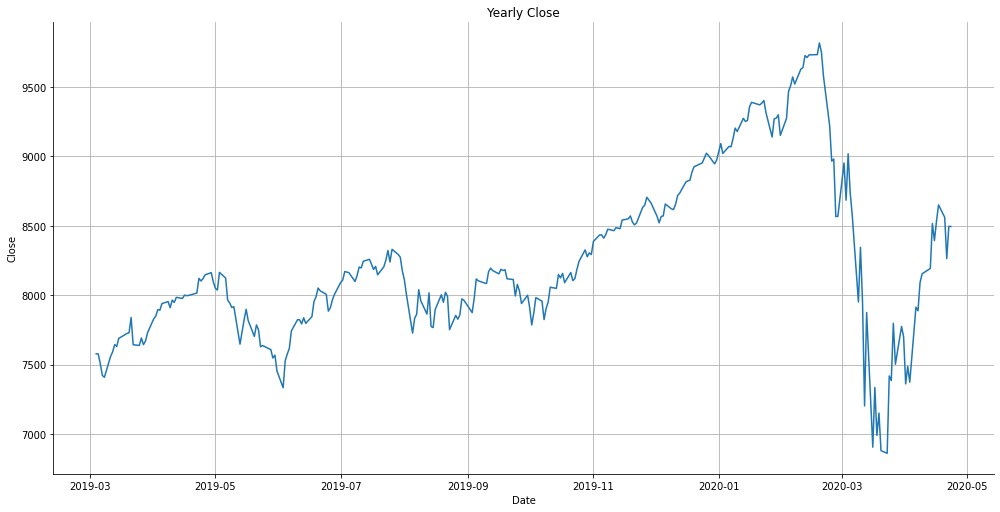

In [0]:
#plot from 2019: sampled data, when I plot all the data it doesnt make much sense.
sns.relplot(x = 'Date', y = 'Close', data=dte, kind='line', height= 7, aspect= 2)
plt.title("Yearly Close")
plt.grid()
plt.show()

In [0]:
# draw a categorical plot based on quaters for one year
 dt = data.query('Year == 2017')

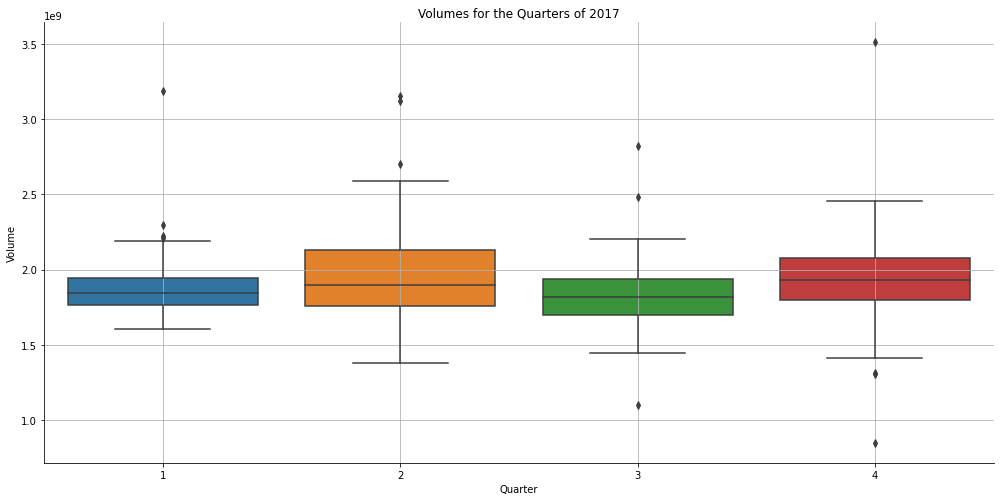

In [0]:
sns.catplot(x = 'Quarter',
            y = 'Volume' ,
            kind = 'box',
            data = dt,
            height = 7,
            aspect = 2)
plt.title ("Volumes for the Quarters of 2017")
plt.grid()

In [0]:
# Resampling

# Here I have to split the data in a way that I take some on which I can simulate a futuristic scenario.

# since 2020 has the least data I am going to train my algorithm to predict on that data

In [0]:
data.dtypes

Date           datetime64[ns]
Open                  float64
High                  float64
Low                   float64
Close                 float64
Adj Close             float64
Volume                  int64
Year                    int64
Quarter                 int64
Bins                    int64
Change                float64
%Change               float64
Direction               int64
Mid                   float64
SMA1                  float64
SMA2                  float64
Ticks                   int64
SMAPosition             int64
dtype: object

# Splitting Data

In [0]:
#create a mask
Test = data[data.Date.dt.year == 2020] #mask based on the year. I took out all the 2020 years
#the trick is that I already have the results of the price fluctuations so I can build a model and compare how its doing.

In [0]:
Train = data.drop(index=data[data.Date.dt.year == 2020].index)

In [0]:
#check whether you have the right years that are needed
Train.Year.unique()

array([1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019])

In [0]:
Test.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Quarter,Bins,Change,%Change,Direction
12335,2020-01-02,9039.459961,9093.429688,9010.889648,9092.190430,9092.190430,2848370000,2020,1,1,52.730469,0.583336,1
12336,2020-01-03,8976.429688,9065.759766,8976.429688,9020.769531,9020.769531,2567400000,2020,1,1,44.339843,0.493959,1
12337,2020-01-06,8943.500000,9072.410156,8943.500000,9071.469727,9071.469727,2788120000,2020,1,1,127.969727,1.430869,1
12338,2020-01-07,9076.639648,9091.929688,9042.549805,9068.580078,9068.580078,2352850000,2020,1,1,-8.059570,-0.088795,0
12339,2020-01-08,9068.030273,9168.889648,9059.379883,9129.240234,9129.240234,2464090000,2020,1,1,61.209961,0.675008,1


Text(0.5, 1.0, 'Count of Records Per Year')

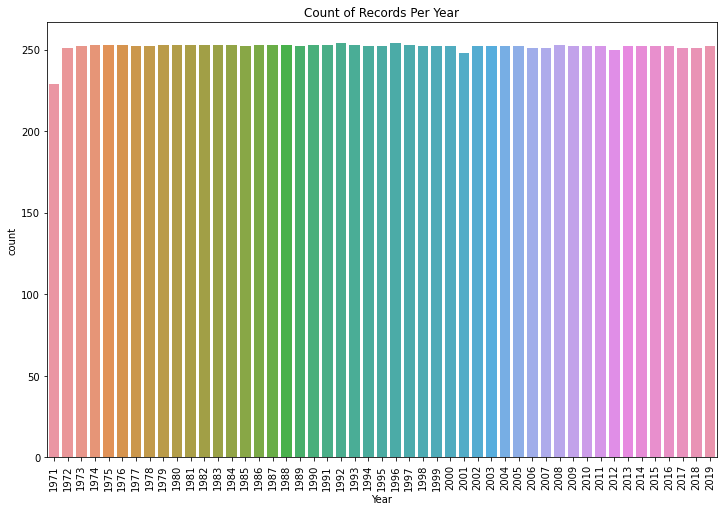

In [0]:
#value counts in years
#make sure there is no 2020
plt.figure ( figsize = (12,8))
sns.countplot(
    x = 'Year',
    data = Train

)
plt.xticks(rotation = 90)
plt.title("Count of Records Per Year")

# Choosing my columns

In [0]:
test = Test[['Date','Low','High','Adj Close','Volume','%Change']]
train = Train[['Date','Low','High','Adj Close','Volume','%Change']]

In [0]:
#split the test dataset with X,y

test_values = test[['Low','High','Adj Close','Volume']]
test_label = test[['%Change']]

In [0]:
from sklearn.model_selection import train_test_split

#let's take X and y out of the dataset
y = train['%Change']
x = train.drop(columns = ['%Change','Date'])

 #resample

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, shuffle = False)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [0]:
model = LinearRegression()
frt = RandomForestRegressor()

In [0]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
 prediction = model.predict(X_test)

In [0]:
#the model score:
model.score(X_test,y_test)

0.43523139715217585

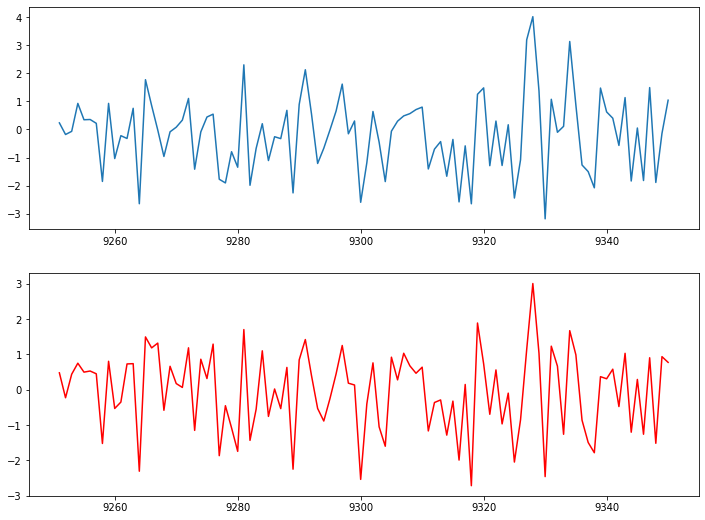

In [0]:
fg, ax = plt.subplots(2,1)
ax[0].plot(X_test.index[:100], y_test[:100])
ax[1].plot(X_test.index[:100], prediction[:100], color = 'red')
fg.set_figheight(9)
fg.set_figwidth(12)